In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

sns.set()

from IPython.display import display
from tools import make_track, ols_regression, make_ER, lasso_regression, lasso_regression_ic, ridge_regression,\
    kalman_filter, kalman_with_selection, selective_kalman_filter
from hc_graph import hc_stock

<IPython.core.display.Javascript object>

Open console to check js libs were loaded in page


In [3]:
fund_name = 'HFRXM'
pd.read_csv(r"financial_data/hfrx_index_names.csv", index_col=0)

,Full Name
Name,
HFRXAR,HFRX Absolute Return Index
HFRXDS,HFRX ED: Distressed Restructuring Index
HFRXMA,HFRX ED: Merger Arbitrage Index
HFRXSS,HFRX ED: Special Situations Index
HFRXEMN,HFRX EH: Equity Market Neutral Index
HFRXEHG,HFRX EH: Fundamental Growth Index
HFRXEHV,HFRX EH: Fundamental Value Index
HFRXEMC,HFRX Emerging Markets Composite Index
HFRXEWC,HFRX Equal Weighted Strategies CHF Index


In [4]:
pd.options.display.max_rows = 76
pd.read_csv(r"financial_data/bnp_index_info.csv", index_col=0).drop(["Execution Costs (bps)", "Replication Costs (bps)"], axis=1)

,Name,Asset Class,Underlying,Currency
Ticker,,,,
BNPIFEU,Eurozone Equity,Equity,Eurostoxx 50,EUR
BNPIFUS,US Equity,Equity,S&P 500,USD
BNPIFJP,Japan Equity,Equity,Nikkei,JPY
BNPIFCN,China Equity,Equity,HSCEI,HKD
BNPIFFR,France Equity,Equity,CAC 40,EUR
BNPIFGE,Germany Equity,Equity,Dax,EUR
BNPIFGB,Great Britain Equity,Equity,FTSE 100,GBP
BNPIFCH,Swiss Equity,Equity,SMI,CHF
BNPIFKR,Korea Equity,Equity,Kospi,KRW


In [5]:
pd.read_csv(r"financial_data/bnp_risk_premia_info.csv", index_col=0)

,Name,Asset class,Style,Return Type,Currency
Ticker,,,,,
BNPIDRXA,BNP Paribas DR Alpha ex-Agriculture and Livest...,Commodities,Carry,ER,EUR
BNPIF3AX,BNP Paribas Alpha Backwardation ex-Agriculture...,Commodities,Carry,ER,EUR
BNPIF3XM,BNP Paribas Alpha Momentum ex-Agriculture and ...,Commodities,Momentum,ER,EUR
BPFXSTGU,BNP Paribas 1M STEER Index,FX,Value,ER,EUR
BNPICCE3,BNP Paribas 103 Call Carry Excess Return Index,Equity,Carry,ER,EUR
BNPIVMRU,BNP Paribas Volatility Mean Reversion US,Equity,Reversal,ER,EUR
BPCURVW4,BNP Paribas Money Market Beta World Index,IR,Carry,ER,EUR
BNPIVCXA,BNP Paribas Commodity Short Variance VCXA ER I...,Commodities,Short Variance,ER,EUR
BNPIAIRT,BNP Paribas AIR T-Note ER Index,Equity,Volatility,ER,EUR


### Financial data loads and cleaning

In [6]:
# US rate
US_rate = pd.read_csv(r"financial_data/USD_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['3M']

# HFRX
hfrx_all = pd.read_csv(r"financial_data/hfrx_daily_index_data.csv", index_col=0, parse_dates=True, dayfirst=True).ffill()
hfrx = make_ER(hfrx_all[[fund_name]].dropna(), US_rate)

# BNP

bnp = pd.read_csv(r"financial_data/bnp_data.csv", index_col=0, parse_dates=True, dayfirst=True) #[["BNPIFEU","BNPIFUS",
                 #"BNPIFJP","BNPIFCN","BNPIFFR","BNPIFGE","BNPIFGB","BNPIFCH","BNPIFKR","BNPIFUSC","BNPIFBR",
                 #"BNPIFAU","BNPIFHK","BNPIFTW","BNPIFSG","BNPIFIT","BNPIFSP","BNPIFSW","BNPIFNE","BNPIFRU","BNPIFEM"]]

risk_premia = pd.read_pickle("financial_data/risk_premia_ER_FX_USD.pkl") #[["BNPICCE3","BNPIVMRU","BNPIAIRT","BNPIAIRU",
                  #"BNPIEC03","BNPIPLEE","BNPIPMEE","BNPIPQEE","BNPIPVEE","BNPILUEE","BNPIPMUH","BNPIPQUH",
                  #"BNPIPVUH","BNPIAIRG","BNPIAIRJ","BNPIAIRE"]]

In [7]:
prices_all = bnp.join(risk_premia,how="outer").ffill().join(hfrx,how="inner")

In [8]:
returns_all = prices_all.resample('1D').first().pct_change().dropna()
hrfx_returns = returns_all[[fund_name]]
returns_all = returns_all.drop(fund_name, axis=1)

In [9]:
alpha = hrfx_returns[fund_name].autocorr(lag=1)
hrfx_returns_adj = ((hrfx_returns - alpha * hrfx_returns.shift(1)) / (1. - alpha)).fillna(0) # 'liquidity adjustment' for
                                                                                             # removing returns autocorrelation
beta = hrfx_returns_adj[fund_name].autocorr(lag=1)

Auto-correlation of HFRXM returns : 0.0773252367704
Auto-correlation of HFRXM adjusted returns : -0.0023386222146


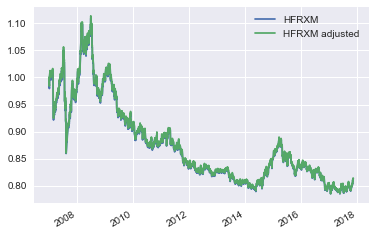

In [10]:
print("Auto-correlation of",fund_name,"returns :", alpha)
print("Auto-correlation of",fund_name,"adjusted returns :", beta)
ax = (1 + hrfx_returns).cumprod().plot()
_ = (1 + hrfx_returns_adj).cumprod()[fund_name].plot(label=fund_name + ' adjusted', legend=True, ax=ax)

In [11]:
size = 120
freq = 5

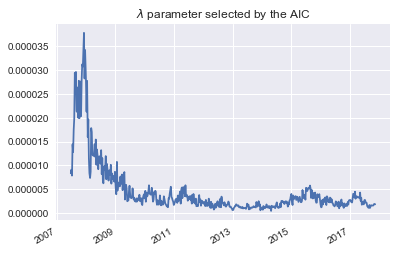

Wall time: 49.9 s


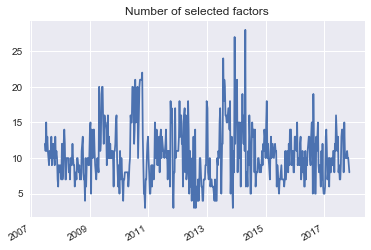

In [12]:
%%time
df_weight_aic, _ = lasso_regression_ic(hrfx_returns, returns_all,sample_length=size, frequency=freq, criterion='aic')
prices_for_track_aic = prices_all.loc[df_weight_aic.index[0]:].drop(fund_name, axis=1)

(df_weight_aic != 0).sum(axis=1).plot(title='Number of selected factors')

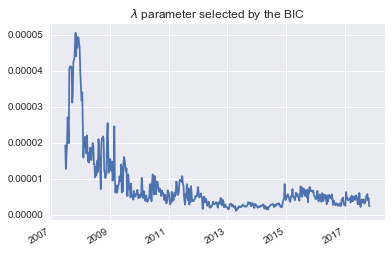

Wall time: 1min


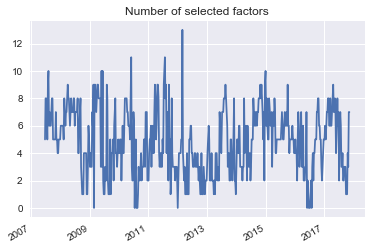

In [13]:
%%time
df_weight_bic, _ = lasso_regression_ic(hrfx_returns, returns_all,sample_length=size, frequency=freq, criterion='bic')
prices_for_track_bic = prices_all.loc[df_weight_bic.index[0]:].drop(fund_name, axis=1)

(df_weight_bic != 0).sum(axis=1).plot(title='Number of selected factors')

In [14]:
%%time
nu = 1.
df_weight_kalman = kalman_filter(hrfx_returns, returns_all,freq, sigma_weight=1. , sigma_return=nu)

prices_for_track_kalman = prices_all.loc[df_weight_kalman.index[0]:]

Wall time: 3.14 s


In [15]:
%%time
nb_period = 63
df_weight_kalman_bic = kalman_with_selection(hrfx_returns, returns_all,sample_length=size, frequency=freq,\
                                          nu=nu, nb_period=nb_period, criterion='bic')

prices_for_track_kalman_bic = prices_all.loc[df_weight_kalman_bic.index[0]:]

Wall time: 3min 32s


In [16]:
%%time
df_weight_kalman_aic = kalman_with_selection(hrfx_returns, returns_all,sample_length=size, frequency=freq,\
                                          nu=nu, nb_period=nb_period, criterion='aic')

prices_for_track_kalman_aic = prices_all.loc[df_weight_kalman_aic.index[0]:]

Wall time: 5min 26s


In [17]:
%%time
df_weight_sel_kalman_bic = selective_kalman_filter(hrfx_returns, returns_all, sample_length=size, frequency=freq,\
                                          nu=nu, criterion='bic')

prices_for_track_sel_kalman_bic = prices_all.loc[df_weight_sel_kalman_bic.index[0]:]

Wall time: 1min 2s


In [18]:
%%time
df_weight_sel_kalman_aic = selective_kalman_filter(hrfx_returns, returns_all, sample_length=size, frequency=freq,\
                                          nu=nu, criterion='aic')

prices_for_track_sel_kalman_aic = prices_all.loc[df_weight_sel_kalman_aic.index[0]:]

Wall time: 1min 1s


In [19]:
%%time
tc = 0.0005
lag = 1

replication_aic = make_track(prices_for_track_aic, df_weight_aic, tc=tc, lag=lag)
df_res = prices_all.loc[replication_aic.index][[fund_name]]
df_res["Lasso AIC"] = replication_aic

replication_bic = make_track(prices_for_track_bic, df_weight_bic, tc=tc, lag=lag)
df_res["Lasso BIC"] = replication_bic

replication_kalman = make_track(prices_for_track_kalman, df_weight_kalman, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["Kalman"] = replication_kalman

replication_kalman_aic = make_track(prices_for_track_kalman_aic, df_weight_kalman_aic, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["Kalman AIC"] = replication_kalman_aic

replication_kalman_bic = make_track(prices_for_track_kalman_bic, df_weight_kalman_bic, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["Kalman BIC"] = replication_kalman_bic

replication_sel_kalman_aic = make_track(prices_for_track_sel_kalman_aic, df_weight_sel_kalman_aic, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["Sel. Kalman AIC"] = replication_sel_kalman_aic

replication_sel_kalman_bic = make_track(prices_for_track_sel_kalman_bic, df_weight_sel_kalman_bic, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["Sel. Kalman BIC"] = replication_sel_kalman_bic

Wall time: 1min 29s


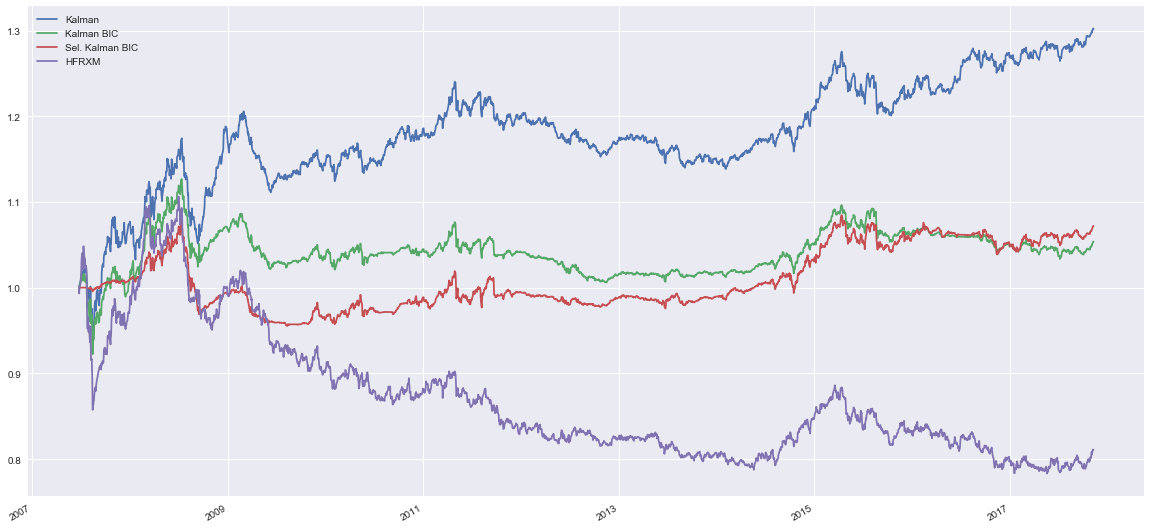

In [20]:
df_res = df_res
df_res = (df_res / df_res.iloc[0])
df_res[['Kalman', 'Kalman BIC', 'Sel. Kalman BIC', fund_name]].plot(figsize=(20,10))

In [21]:
rho = df_res.pct_change().corr(method="pearson")
tau = df_res.pct_change().corr(method="kendall")
returns_track = df_res.pct_change().dropna()
fund = returns_track[fund_name]
returns_track = returns_track
df = pd.DataFrame()
df['Tracking error'] = (returns_track.T - fund.values).std(axis=1)
df['R-squared'] = 1 - (returns_track.T - fund.values).var(axis=1) / fund.values.var()
df['Sharpe ratio'] = np.sqrt(252) * returns_track.mean() / returns_track.std()
df['Annual Return'] =  (df_res.iloc[-1] / df_res.iloc[0]) ** (252 / len(df_res.index)) - 1
df['Correlation'] = rho[fund_name]
df['Kendall tau'] = tau[fund_name]
df

,Tracking error,R-squared,Sharpe ratio,Annual Return,Correlation,Kendall tau
HFRXM,0.000000,1.000000,-0.289738,-0.0200121,1.000000,1.000000
Lasso AIC,0.002998,0.428061,0.256481,0.00939881,0.654981,0.418353
Lasso BIC,0.003113,0.383294,0.185402,0.00549161,0.629984,0.389404
Kalman,0.002984,0.433324,0.533923,0.0257188,0.669861,0.448916
Kalman AIC,0.002963,0.441391,0.247136,0.0102626,0.666922,0.432924
Kalman BIC,0.003062,0.403339,0.147191,0.0050528,0.635302,0.395210
Sel. Kalman AIC,0.003395,0.266593,0.398318,0.0132767,0.517625,0.379361
Sel. Kalman BIC,0.003469,0.234362,0.229757,0.00669683,0.484533,0.360924


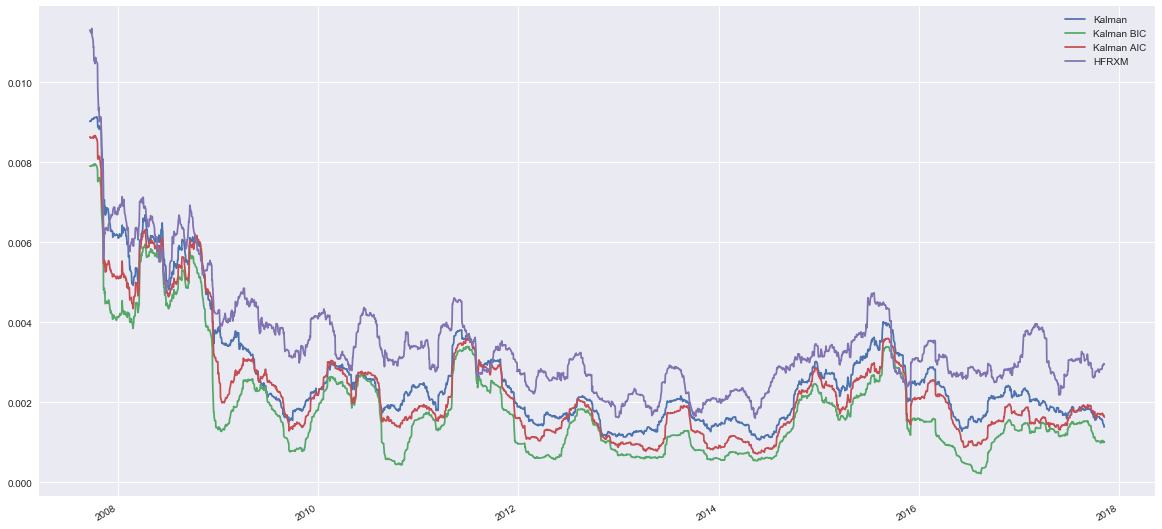

In [22]:
vol = df_res.pct_change().rolling(window=60).std().dropna()
vol[['Kalman', 'Kalman BIC', 'Kalman AIC', fund_name]].plot(figsize=(20,10))

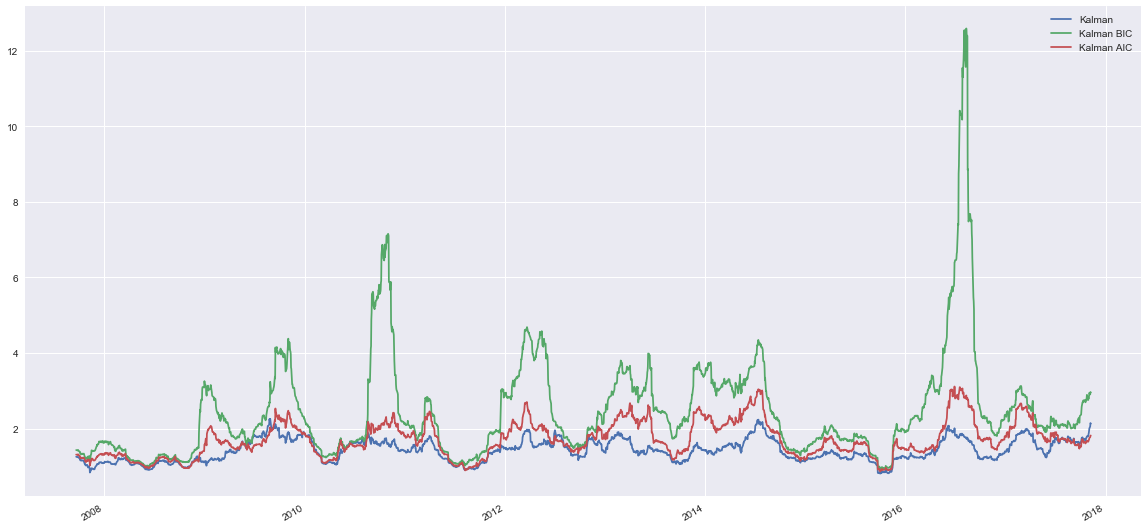

In [23]:
vol_fund = vol[fund_name]
vol_ratio = 1. / vol.div(vol_fund, axis='index').drop(fund_name, axis=1)
vol_ratio[['Kalman', 'Kalman BIC', 'Kalman AIC']].plot(figsize=(20,10))

In [24]:
prices_for_track_all = prices_for_track_aic[df_weight_aic.multiply(vol_ratio['Lasso AIC'], axis='index').dropna().index[0]:]

replication_aic_voladj = make_track(prices_for_track_all, df_weight_aic.multiply(vol_ratio['Lasso AIC'], axis='index').dropna(), tc=tc, lag=lag)
df_res_voladj = prices_all.loc[replication_aic_voladj.index][[fund_name]]
df_res_voladj["Lasso AIC"] = replication_aic_voladj

replication_bic_voladj = make_track(prices_for_track_all, df_weight_bic.multiply(vol_ratio['Lasso BIC'], axis='index').dropna(), tc=tc, lag=lag)
df_res_voladj["Lasso BIC"] = replication_bic_voladj

prices_for_track_all = prices_for_track_kalman[df_weight_kalman.multiply(vol_ratio['Kalman'], axis='index').dropna().index[0]:]

replication_kalman_voladj = make_track(prices_for_track_all, df_weight_kalman.multiply(vol_ratio['Kalman'], axis='index').dropna(), tc=tc, lag=lag).loc[df_res_voladj.index[0]:]
df_res_voladj["Kalman"] = replication_kalman_voladj

prices_for_track_all = prices_for_track_kalman_aic[df_weight_kalman_aic.multiply(vol_ratio['Kalman AIC'], axis='index').dropna().index[0]:]

replication_kalman_aic_voladj = make_track(prices_for_track_all, df_weight_kalman_aic.multiply(vol_ratio['Kalman AIC'], axis='index').dropna(), tc=tc, lag=lag).loc[df_res_voladj.index[0]:]
df_res_voladj["Kalman AIC"] = replication_kalman_aic_voladj

replication_kalman_bic_voladj = make_track(prices_for_track_all, df_weight_kalman_bic.multiply(vol_ratio['Kalman BIC'], axis='index').dropna(), tc=tc, lag=lag).loc[df_res_voladj.index[0]:]
df_res_voladj["Kalman BIC"] = replication_kalman_bic_voladj

replication_sel_kalman_aic_voladj = make_track(prices_for_track_all, df_weight_sel_kalman_aic.multiply(vol_ratio['Sel. Kalman AIC'], axis='index').dropna(), tc=tc, lag=lag).loc[df_res_voladj.index[0]:]
df_res_voladj["Sel. Kalman AIC"] = replication_sel_kalman_aic_voladj

replication_sel_kalman_bic_voladj = make_track(prices_for_track_all, df_weight_sel_kalman_bic.multiply(vol_ratio['Sel. Kalman BIC'], axis='index').dropna(), tc=tc, lag=lag).loc[df_res_voladj.index[0]:]
df_res_voladj["Sel. Kalman BIC"] = replication_sel_kalman_bic_voladj

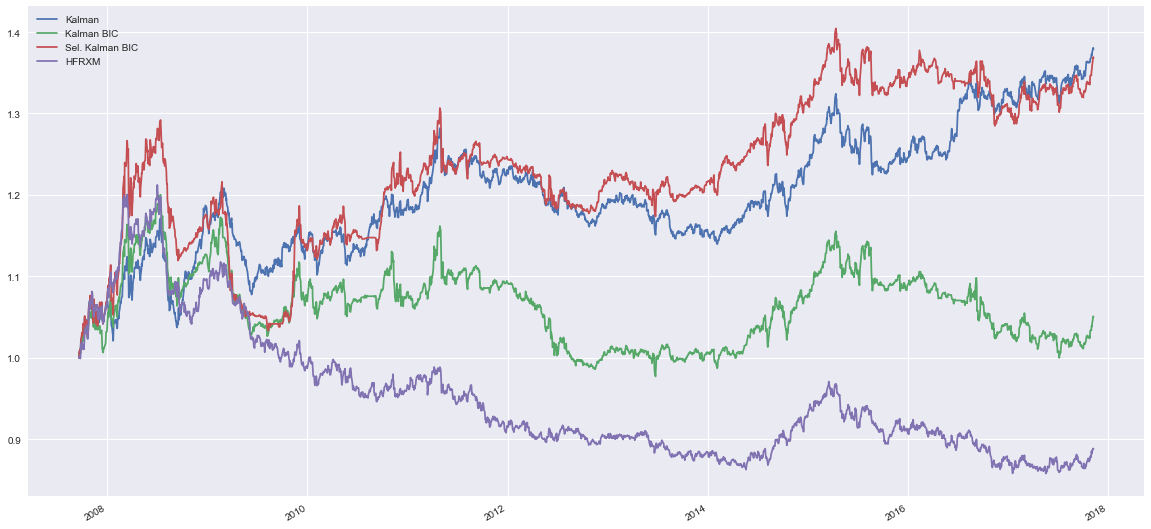

In [25]:
df_res_voladj = df_res_voladj.bfill()
df_res_voladj = (df_res_voladj / df_res_voladj.iloc[0])
df_res_voladj[['Kalman', 'Kalman BIC', 'Sel. Kalman BIC', fund_name]].plot(figsize=(20,10))

In [26]:
g = hc_stock(df_res_voladj)
g.plot()

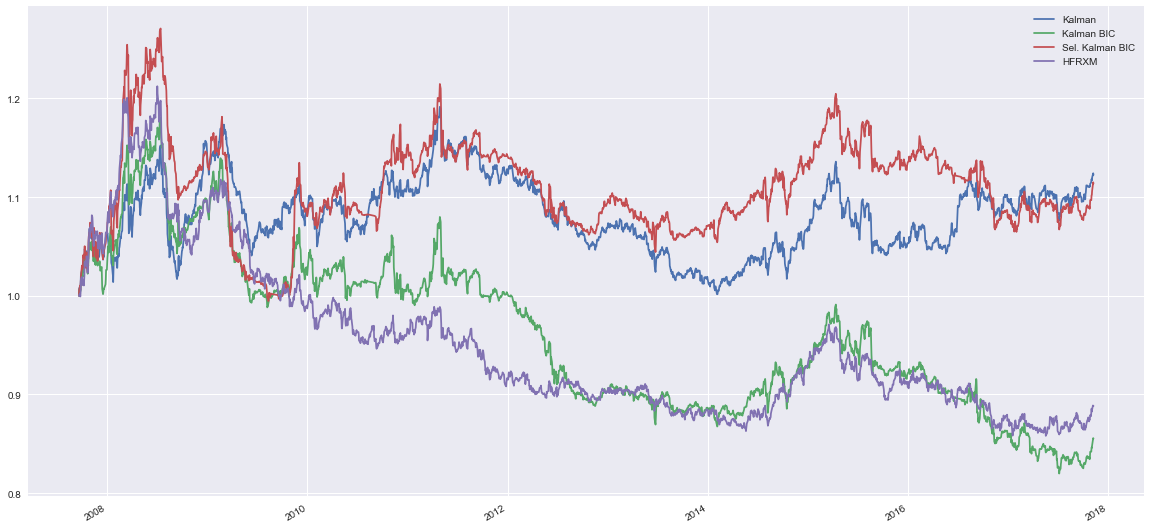

In [27]:
df_res_volperfadj = df_res_voladj[[fund_name]].copy()
temp = df_res_voladj.drop(fund_name, axis=1)
df_res_volperfadj[temp.columns]= make_ER(temp, 2 + 0 * US_rate)
df_res_volperfadj[['Kalman', 'Kalman BIC', 'Sel. Kalman BIC', fund_name]].plot(figsize=(20,10))

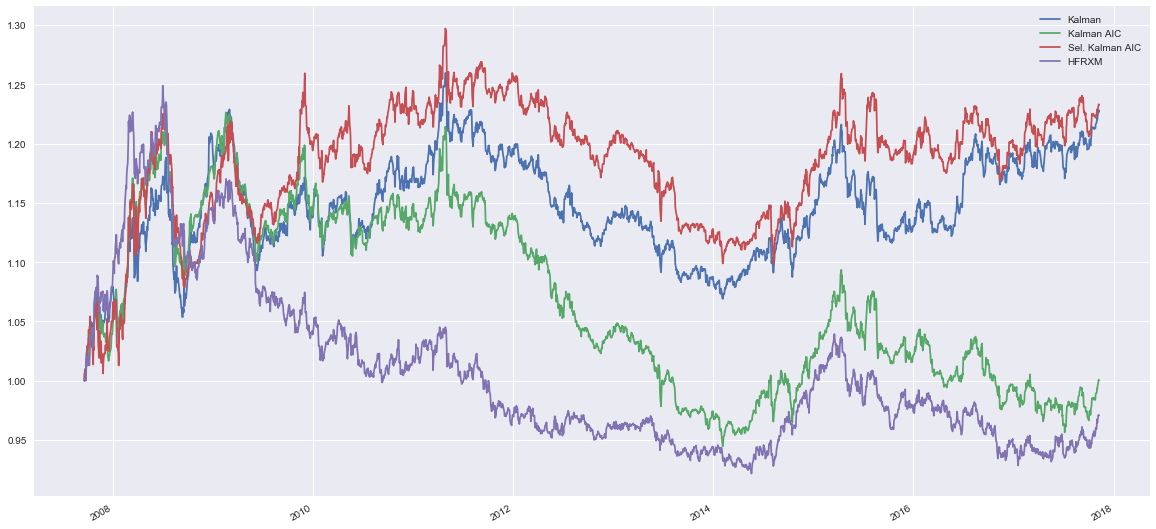

In [40]:
df_res_volperfadj_TR = make_ER(df_res_volperfadj, -US_rate)
df_res_volperfadj_TR[['Kalman', 'Kalman BIC', 'Sel. Kalman BIC', fund_name]].plot(figsize=(20,10))

In [29]:
rho = df_res_voladj.pct_change().corr(method="pearson")
tau = df_res_voladj.pct_change().corr(method="kendall")
returns_track = df_res_voladj.pct_change().dropna()
fund = returns_track[fund_name]
returns_track = returns_track
df = pd.DataFrame()
df['Tracking error'] = (returns_track.T - fund.values).std(axis=1)
df['R-squared'] = 1 - (returns_track.T - fund.values).var(axis=1) / fund.values.var()
df['Sharpe ratio'] = np.sqrt(252) * returns_track.mean() / returns_track.std()
df['Annual Return'] =  (df_res_voladj.iloc[-1] / df_res_voladj.iloc[0]) ** (252 / len(df_res_voladj.index)) - 1
df['Correlation'] = rho[fund_name]
df['Kendall tau'] = tau[fund_name]
df

,Tracking error,R-squared,Sharpe ratio,Annual Return,Correlation,Kendall tau
HFRXM,0.000000,1.000000,-0.174679,-0.011614,1.000000,1.000000
Lasso AIC,0.003280,0.178058,0.174366,0.008788,0.613517,0.406497
Lasso BIC,0.003544,0.040397,0.060801,0.001841,0.574421,0.374666
Kalman,0.003074,0.278047,0.570183,0.032176,0.646318,0.439169
Kalman AIC,0.003220,0.207891,0.220386,0.011626,0.628168,0.419809
Kalman BIC,0.003520,0.053554,0.107642,0.004863,0.584108,0.379935
Sel. Kalman AIC,0.003517,0.055008,0.515094,0.032661,0.604745,0.394657
Sel. Kalman BIC,0.003885,-0.153136,0.467743,0.031373,0.561363,0.373269


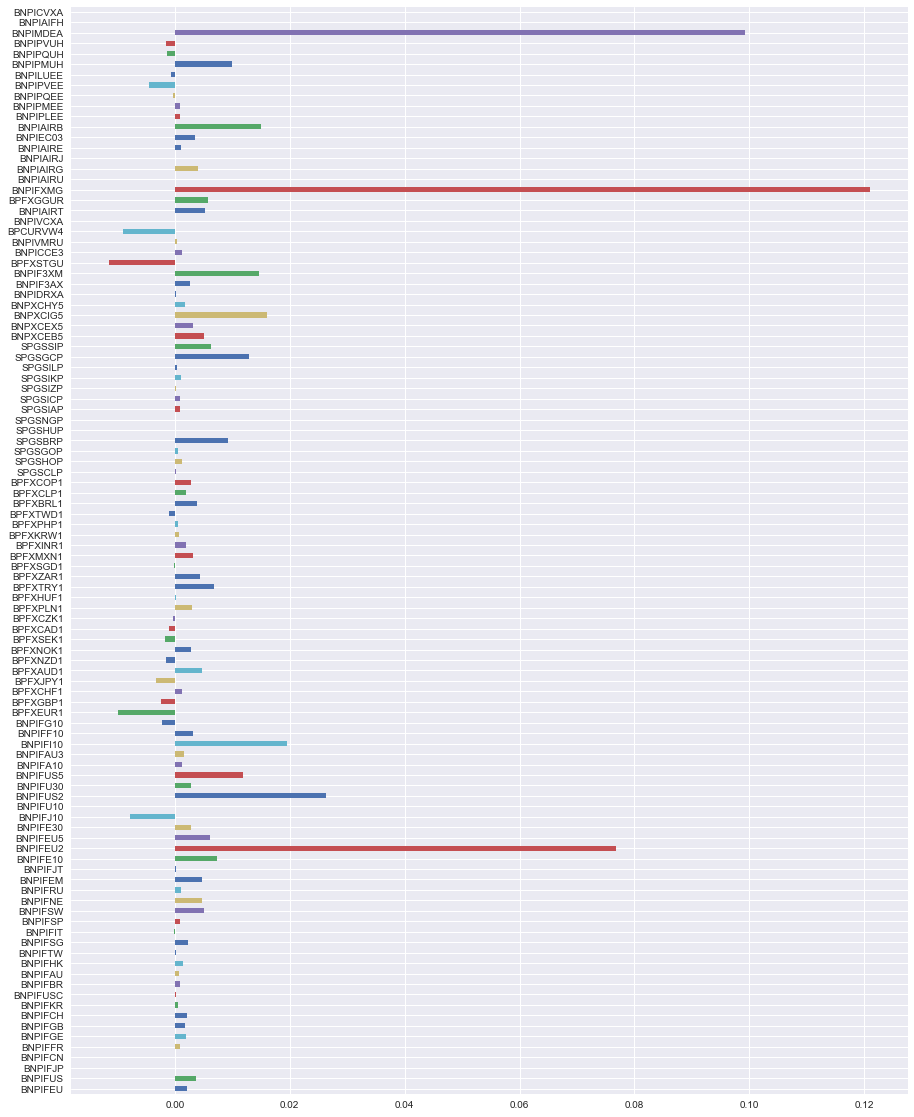

In [30]:
(df_weight_aic).mean(axis=0).plot(kind='barh', figsize=(15,20))

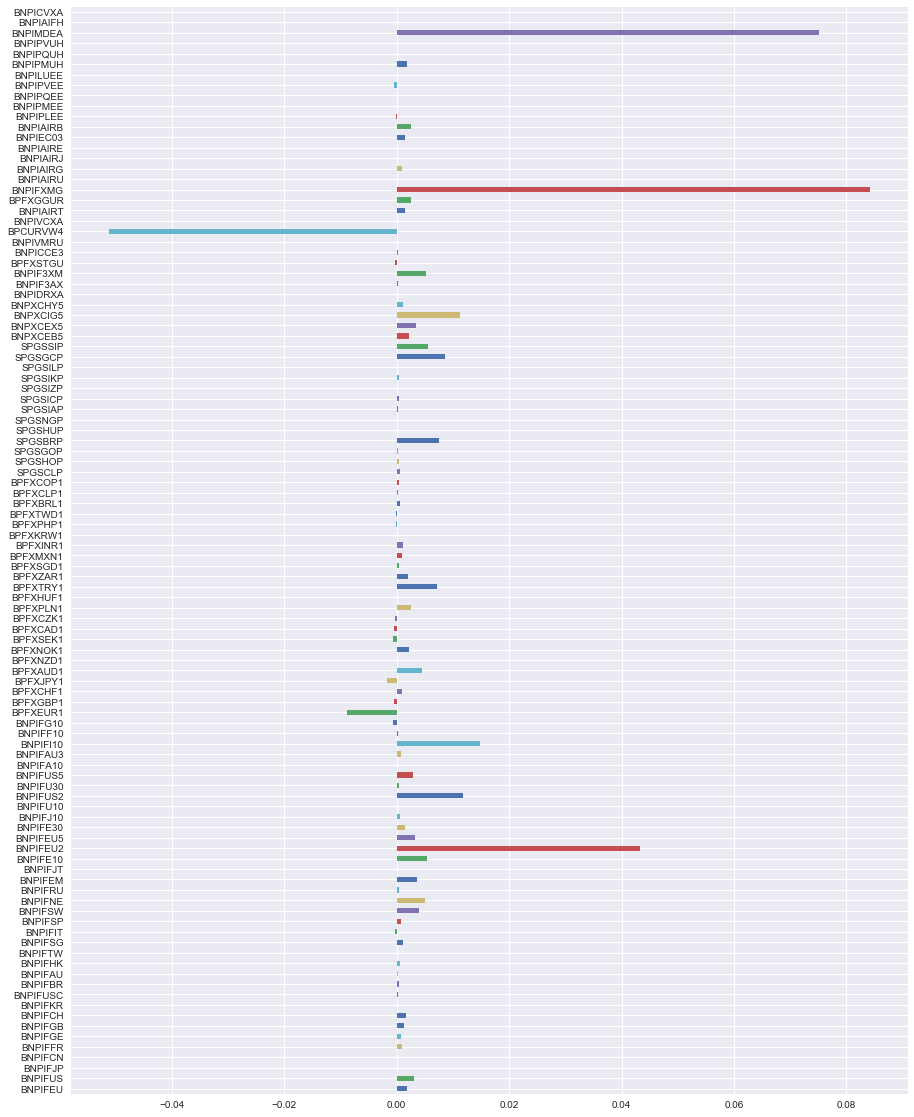

In [31]:
(df_weight_bic).mean(axis=0).plot(kind='barh', figsize=(15,20))

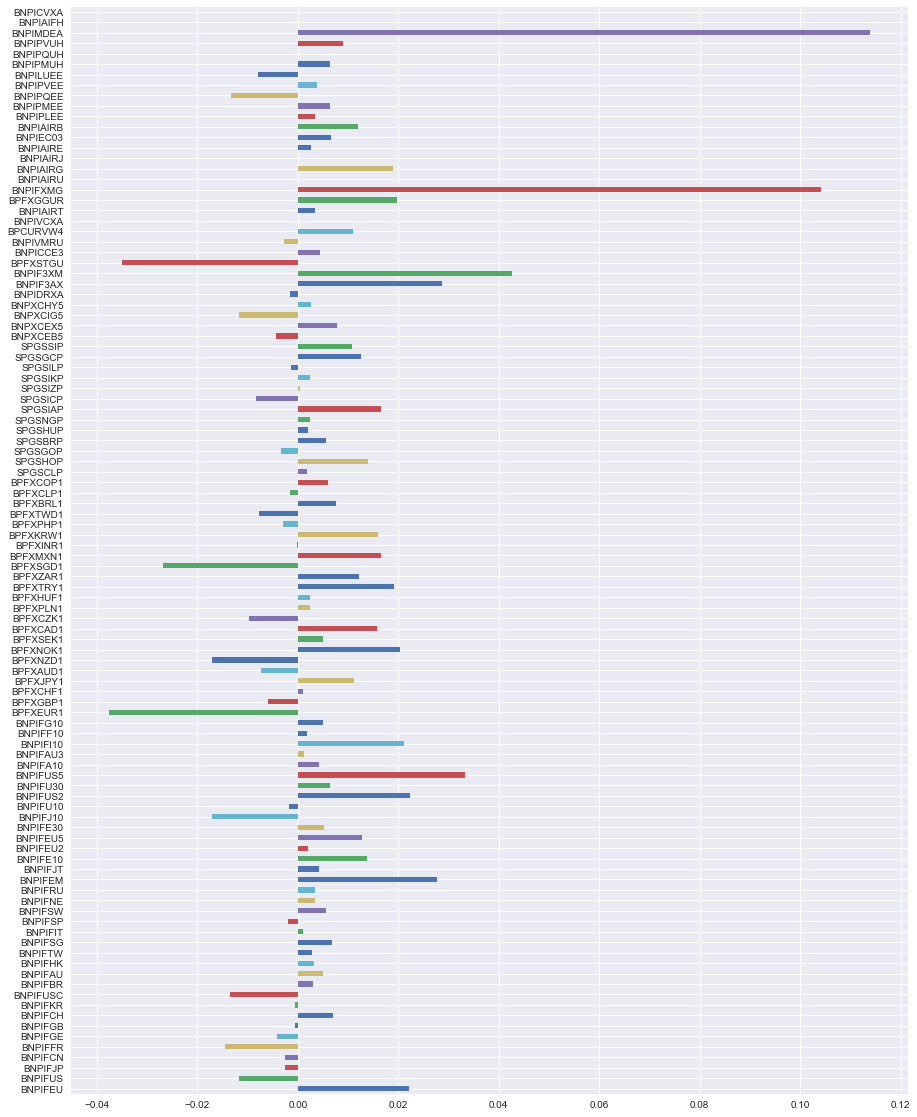

In [32]:
df_weight_kalman.loc[df_res.index[0]:].mean(axis=0).plot(kind='barh', figsize=(15,20))

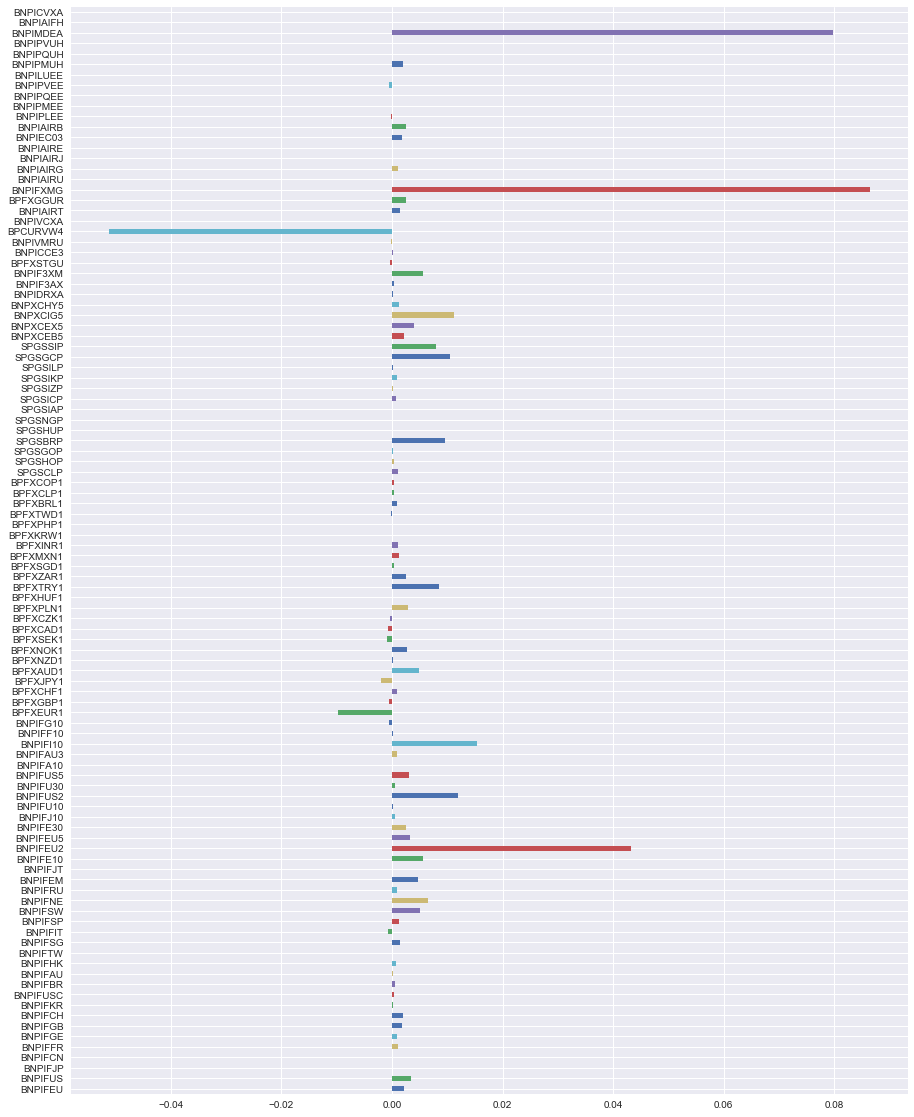

In [33]:
df_weight_kalman_bic.loc[df_res.index[0]:].mean(axis=0).plot(kind='barh', figsize=(15,20))

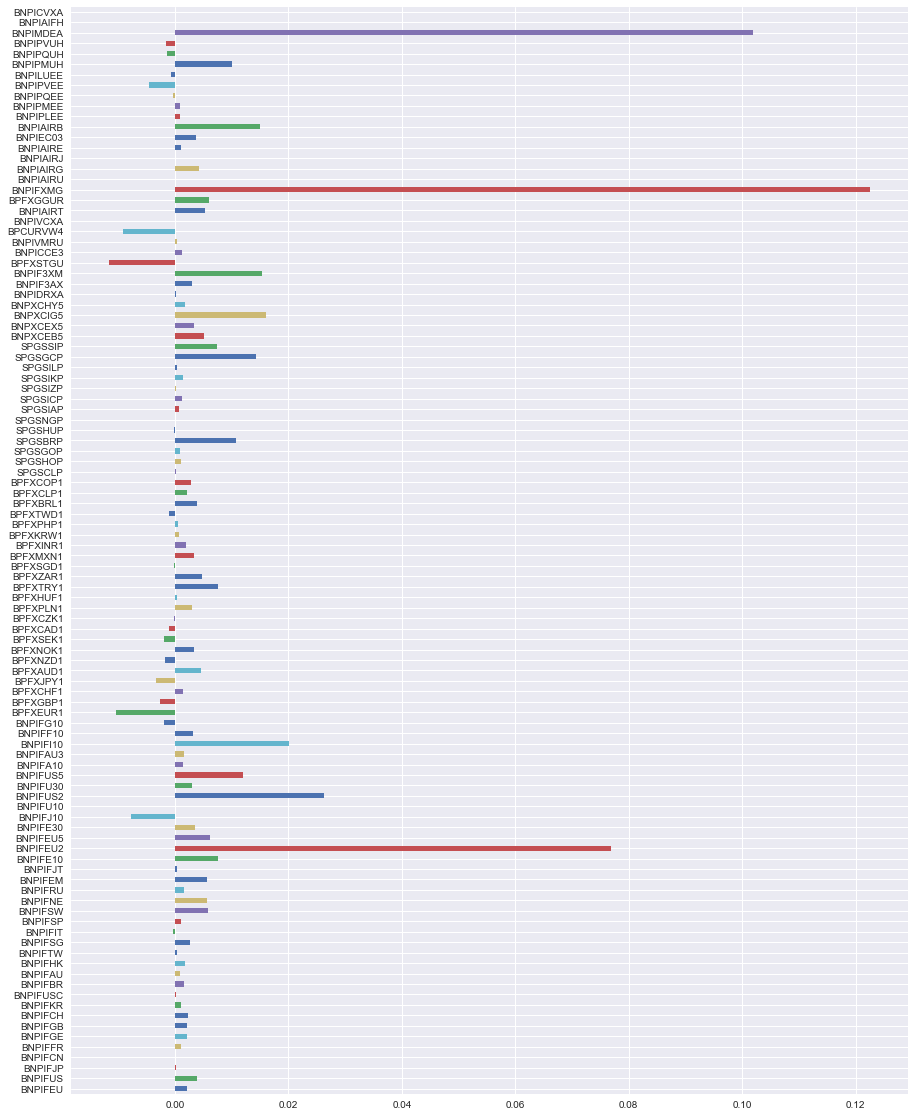

In [34]:
df_weight_kalman_aic.loc[df_res.index[0]:].mean(axis=0).plot(kind='barh', figsize=(15,20))

In [35]:
df_res[fund_name].pct_change().autocorr(lag=1)

0.049890745772697642

In [36]:
df_res['Kalman'].pct_change().autocorr(lag=1)

0.091214610429553256

In [37]:
df_res['Kalman BIC'].pct_change().autocorr(lag=1)

0.077836348093422755

In [38]:
df_res['Kalman AIC'].pct_change().autocorr(lag=1)

0.086120960989331169

In [39]:
df_res['Lasso AIC'].pct_change().autocorr(lag=1)

0.092250352218691017